https://rcvaram.medium.com/glare-removal-with-inpainting-opencv-python-95355aa2aa52

In [3]:
from matplotlib import pyplot as plt
import skimage.measure as measure
from skimage.measure import label
import pandas as pd
import numpy as np
import pytesseract
import shutil
import cv2
import os



In [4]:
print(os.getcwd())

d:\MTU\_Project_Grunt_Work\Glare_Test


In [15]:
# Function to show an image using pyplot
def show_img(img, size=12, title=None):
  fig = plt.gcf()
  fig.set_size_inches(size, size)
  plt.axis("off")
  plt.title(title)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

In [16]:
def create_mask(image):
    show_img(image, 5, "original")
    gray = cv2.cvtColor( image, cv2.COLOR_BGR2GRAY )
    blurred = cv2.GaussianBlur( gray, (9,9), 0 )
    show_img(blurred, 5, "blurred")
    _,thresh_img = cv2.threshold( blurred, 180, 255, cv2.THRESH_BINARY)
    show_img(thresh_img, 5, "thresh_img")
    thresh_img = cv2.erode( thresh_img, None, iterations=2 )
    thresh_img  = cv2.dilate( thresh_img, None, iterations=4 )
    # perform a connected component analysis on the thresholded image,
    # then initialize a mask to store only the "large" components
    labels = measure.label( thresh_img,  background=0 )
    mask = np.zeros( thresh_img.shape, dtype="uint8" )
    # loop over the unique components
    for label in np.unique( labels ):
        # if this is the background label, ignore it
        if label == 0:
            continue
        # otherwise, construct the label mask and count the
        # number of pixels
        labelMask = np.zeros( thresh_img.shape, dtype="uint8" )
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero( labelMask )
        # if the number of pixels in the component is sufficiently
        # large, then add it to our mask of "large blobs"
        if numPixels > 300:
            mask = cv2.add( mask, labelMask )
    return mask

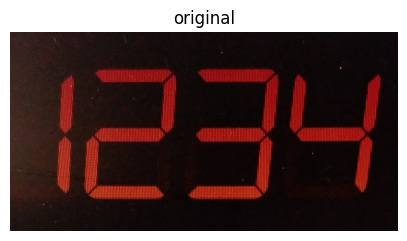

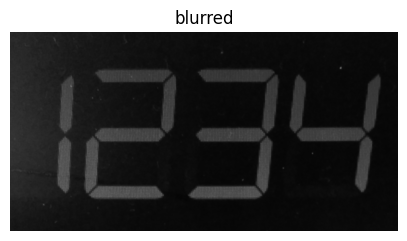

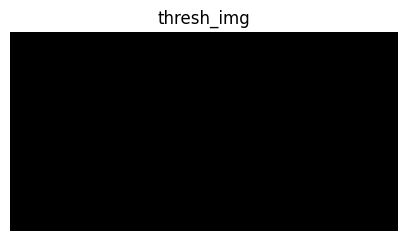

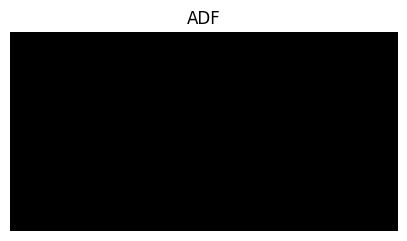

In [17]:
img = cv2.imread("testfile.jpg")
img2 = create_mask(img)
show_img(img2, 5, "ADF")

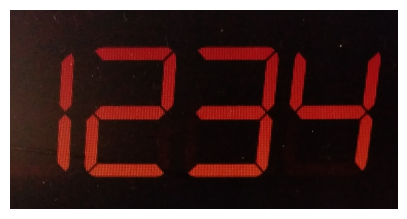

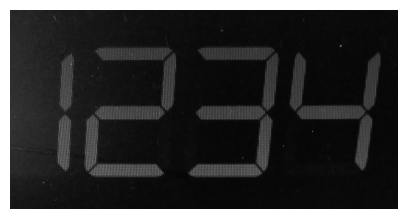

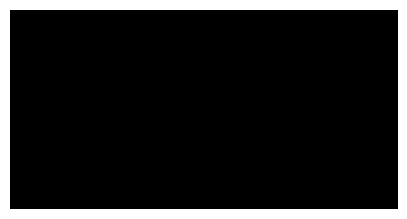

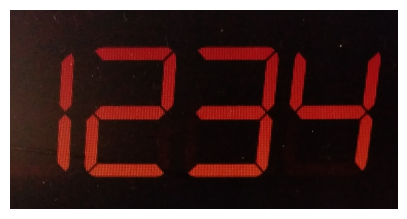

In [9]:
import cv2
import numpy as np

# read image
img = cv2.imread('testfile.jpg')

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold grayscale image to extract glare
mask = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY)[1]

# Optionally add some morphology close and open, if desired
#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
#mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=1)
#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
#mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)


# use mask with input to do inpainting
result = cv2.inpaint(img, mask, 21, cv2.INPAINT_TELEA) 

# write result to disk
cv2.imwrite("testfile_mask.jpg", mask)
cv2.imwrite("testfile_inpaint.jpg", result)

# display it
show_img(img, 5)
show_img(gray, 5)
show_img(mask, 5)
show_img(result, 5)
